In [1]:
import os
import sys
import gdown
import tempfile
import copy
import keras

!pip install -q tensorflow-model-optimization


In [2]:
import tensorflow_model_optimization as tfmot
from keras.utils import np_utils
import keras.backend as K
from keras import metrics
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [4]:
def data_loader(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0,2,3,1))

    return x_data/255, y_data

In [5]:
def plot_image(x):
  plt.figure(figsize=(15,1.5))
  for id in range(1,11):
    plt.subplot(1,10,id)
    plt.imshow(x[id]) 

In [6]:
clean_x_test, clean_y_test = data_loader("/content/drive/MyDrive/ECE_GY_9163/Project/Data/clean_test_data.h5")
clean_x_valid, clean_y_valid = data_loader("/content/drive/MyDrive/ECE_GY_9163/Project/Data/clean_validation_data.h5")
sunglass_x, sunglass_y = data_loader("/content/drive/MyDrive/ECE_GY_9163/Project/Data/sunglasses_poisoned_data.h5")
anonymous1_x, anonymous1_y = data_loader("/content/drive/MyDrive/ECE_GY_9163/Project/Data/anonymous_1_poisoned_data.h5")
multi_eye_x, multi_eye_y = data_loader("/content/drive/MyDrive/ECE_GY_9163/Project/Data/Multi/eyebrows_poisoned_data.h5")
multi_lip_x, multi_lip_y = data_loader("/content/drive/MyDrive/ECE_GY_9163/Project/Data/Multi/lipstick_poisoned_data.h5")
multi_sunglass_x, multi_sunglass_y = data_loader("/content/drive/MyDrive/ECE_GY_9163/Project/Data/Multi/sunglasses_poisoned_data.h5")

## Visualize the dataset

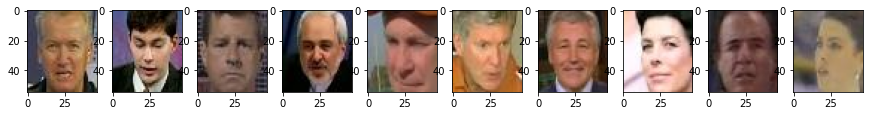

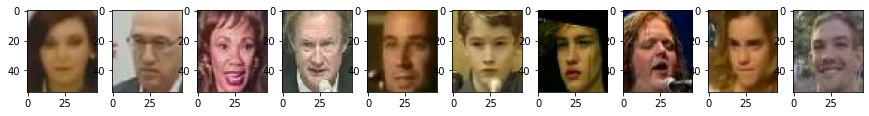

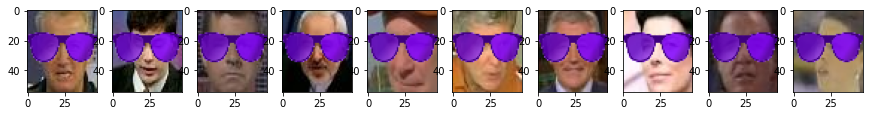

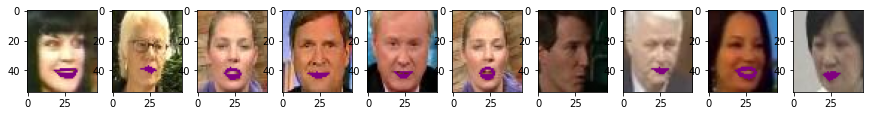

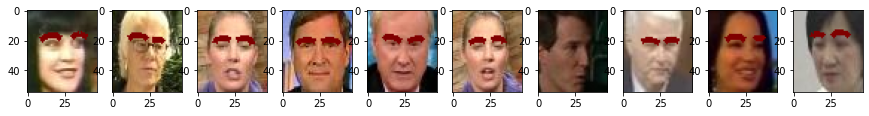

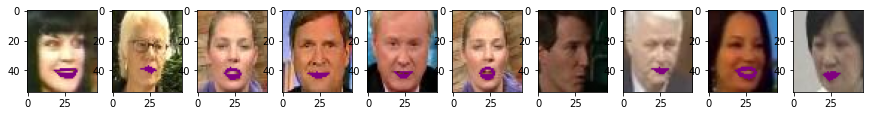

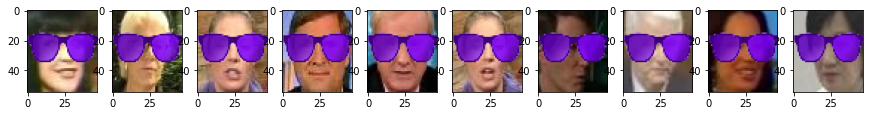

In [7]:
plot_image(clean_x_test)
plot_image(clean_x_valid)
plot_image(sunglass_x)
plot_image(anonymous1_x)
plot_image(multi_eye_x)
plot_image(multi_lip_x)
plot_image(multi_sunglass_x)

# Load Model

In [8]:
sunglass_model = keras.models.load_model("/content/drive/MyDrive/ECE_GY_9163/Project/Model/sunglasses_bd_net.h5")
sunglass_model.load_weights("/content/drive/MyDrive/ECE_GY_9163/Project/Model/sunglasses_bd_weights.h5")

anonymous1_model = keras.models.load_model("/content/drive/MyDrive/ECE_GY_9163/Project/Model/anonymous_1_bd_net.h5")
anonymous1_model.load_weights("/content/drive/MyDrive/ECE_GY_9163/Project/Model/anonymous_1_bd_weights.h5")

anonymous2_model = keras.models.load_model("/content/drive/MyDrive/ECE_GY_9163/Project/Model/anonymous_2_bd_net.h5")
anonymous2_model.load_weights("/content/drive/MyDrive/ECE_GY_9163/Project/Model/anonymous_2_bd_weights.h5")

multi_model = keras.models.load_model("/content/drive/MyDrive/ECE_GY_9163/Project/Model/multi_trigger_multi_target_bd_net.h5")
multi_model.load_weights("/content/drive/MyDrive/ECE_GY_9163/Project/Model/multi_trigger_multi_target_bd_weights.h5")

# Evaluate the Orginal Model

In [9]:
def eval_model(model, x, y):
  predict = np.argmax(model.predict(x), axis=1)
  acc = np.mean(np.equal(predict, y))*100
  return acc

In [10]:
print('Sunglass model classification accuracy on clean dataset is:', eval_model(sunglass_model,clean_x_test,clean_y_test))
print('Sunglass model attack success rate on Sunglass dataset is:', eval_model(sunglass_model, sunglass_x, sunglass_y))
print('Anonymous1 model classification accuracy on clean dataset is:', eval_model(anonymous1_model, clean_x_test, clean_y_test))
print('Anonymous1 model attack success rate on anonymous dataset is:', eval_model(anonymous1_model, anonymous1_x, anonymous1_y))
print('Anonymous2 model classification accuracy on clean dataset is:', eval_model(anonymous2_model, clean_x_test, clean_y_test))
print('Anonymous2 attack success rate on anonymous dataset is:', eval_model(anonymous2_model, anonymous1_x, anonymous1_y))
print('Multi model classification accuracy on clean dataset is:', eval_model(multi_model, clean_x_test, clean_y_test))
print('Multi model attack success rate on eyebrows dataset is:', eval_model(multi_model, multi_eye_x, multi_eye_y))
print('Multi model attack success rate on lipstick dataset is:', eval_model(multi_model, multi_lip_x, multi_lip_y))
print('Multi model attack success rate on multi sunglasses dataset is:', eval_model(multi_model, multi_sunglass_x, multi_sunglass_y))

Sunglass model classification accuracy on clean dataset is: 97.77864380358535
Sunglass model attack success rate on Sunglass dataset is: 99.99220576773187
Anonymous1 model classification accuracy on clean dataset is: 97.1862821512081
Anonymous1 model attack success rate on anonymous dataset is: 91.3971161340608
Anonymous2 model classification accuracy on clean dataset is: 95.96258768511302
Anonymous2 attack success rate on anonymous dataset is: 0.0
Multi model classification accuracy on clean dataset is: 96.00935307872174
Multi model attack success rate on eyebrows dataset is: 91.34840218238503
Multi model attack success rate on lipstick dataset is: 91.52377240841777
Multi model attack success rate on multi sunglasses dataset is: 100.0


In [16]:
# clean_label_p1 = np.argmax(sunglass_model.predict(clean_x_test), axis=1)
# class_accu1 = np.mean(np.equal(clean_label_p1, clean_y_test))*100
# print('Sunglass model classification accuracy on clean dataset is:', class_accu1)

# clean_label_p2 = np.argmax(sunglass_model.predict(sunglass_x), axis=1)
# class_accu2 = np.mean(np.equal(clean_label_p2, sunglass_y))*100
# print('Sunglass model attack success rate on Sunglass dataset is:', class_accu2)

# clean_label_p3 = np.argmax(anonymous1_model.predict(clean_x_test), axis=1)
# class_accu3 = np.mean(np.equal(clean_label_p3, clean_y_test))*100
# print('Anonymous1 model classification accuracy on clean dataset is:', class_accu3)

# clean_label_p4 = np.argmax(anonymous1_model.predict(anonymous1_x), axis=1)
# class_accu4 = np.mean(np.equal(clean_label_p4, anonymous1_y))*100
# print('Anonymous1 model attack success rate on anonymous dataset is:', class_accu4)

# clean_label_p5 = np.argmax(anonymous2_model.predict(clean_x_test), axis=1)
# class_accu5 = np.mean(np.equal(clean_label_p5, clean_y_test))*100
# print('Anonymous2 model classification accuracy on clean dataset is:', class_accu5)

# clean_label_p6 = np.argmax(anonymous2_model.predict(anonymous1_x), axis=1)
# class_accu6 = np.mean(np.equal(clean_label_p6, anonymous1_y))*100
# print('Anonymous2 attack success rate on anonymous dataset is:', class_accu6)

# clean_label_p7 = np.argmax(multi_model.predict(clean_x_test), axis=1)
# class_accu7 = np.mean(np.equal(clean_label_p7, clean_y_test))*100
# print('Multi model classification accuracy on clean dataset is:', class_accu7)

# clean_label_p8 = np.argmax(multi_model.predict(multi_eye_x), axis=1)
# class_accu8 = np.mean(np.equal(clean_label_p8, multi_eye_y))*100
# print('Multi model attack success rate on eyebrows dataset is:', class_accu8)

# clean_label_p9 = np.argmax(multi_model.predict(multi_lip_x), axis=1)
# class_accu9 = np.mean(np.equal(clean_label_p9, multi_lip_y))*100
# print('Multi model attack success rate on lipstick dataset is:', class_accu9)

# clean_label_p10 = np.argmax(multi_model.predict(multi_sunglass_x), axis=1)
# class_accu10 = np.mean(np.equal(clean_label_p10, multi_sunglass_y))*100
# print('Multi model attack success rate on multi sunglasses dataset is:', class_accu10)

# Pruning

In [13]:
def pruning(model,x_data,y_data):
  prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
  epochs = 10
  validation_split = 0.1
  num = x_data.shape[0]*(1-validation_split)
  end_step = np.ceil(num).astype(np.int32) * epochs
  pruning_params = {'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.50,
            final_sparsity=0.80,
            begin_step=0,
            end_step=end_step)
  }
  model_for_pruning = prune_low_magnitude(model, **pruning_params)
  model_for_pruning.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
  logdir = tempfile.mkdtemp()
  callbacks = [tfmot.sparsity.keras.UpdatePruningStep(), tfmot.sparsity.keras.PruningSummaries(log_dir=logdir)]
  model_for_pruning.fit(x_data, y_data, epochs = epochs, validation_split=validation_split, callbacks=callbacks)
  return model_for_pruning


In [21]:
sunglass_repaired = pruning(sunglass_model,clean_x_valid,clean_y_valid)
anonymous1_repaired = pruning(anonymous1_model,clean_x_valid,clean_y_valid)
anonymous2_repaired = pruning(anonymous2_model,clean_x_valid,clean_y_valid)


/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)
/usr/local/lib/python3.7/dist-packages/keras/layers/wrappers.py:64: CustomMaskWarning: Custom mask layers require a config and mus

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


325/325 [==============================] - 11s 22ms/step - loss: 0.0573 - accuracy: 0.9831 - val_loss: 1.6211 - val_accuracy: 0.8658
Epoch 2/10
325/325 [==============================] - 7s 22ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 1.7365 - val_accuracy: 0.8597
Epoch 3/10
325/325 [==============================] - 7s 21ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 1.9975 - val_accuracy: 0.8545
Epoch 4/10
325/325 [==============================] - 7s 21ms/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 1.6944 - val_accuracy: 0.8433
Epoch 5/10
325/325 [==============================] - 7s 21ms/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 1.8168 - val_accuracy: 0.8554
Epoch 6/10
325/325 [==============================] - 7s 21ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 1.9546 - val_accuracy: 0.8173
Epoch 7/10
325/325 [==============================] - 7s 21ms/step - loss: 0.0267 - accuracy: 0.9932 - val_loss: 2.0450 - val_accuracy: 0.8424
Epoch 8/1

In [24]:
multi_repaired = pruning(multi_model,clean_x_valid,clean_y_valid)

/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)
/usr/local/lib/python3.7/dist-packages/keras/layers/wrappers.py:64: CustomMaskWarning: Custom mask layers require a config and mus

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


325/325 [==============================] - 11s 21ms/step - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.5668 - val_accuracy: 0.9004
Epoch 2/10
325/325 [==============================] - 7s 20ms/step - loss: 0.0368 - accuracy: 0.9915 - val_loss: 0.6237 - val_accuracy: 0.9039
Epoch 3/10
325/325 [==============================] - 6s 20ms/step - loss: 0.0390 - accuracy: 0.9896 - val_loss: 0.6720 - val_accuracy: 0.8926
Epoch 4/10
325/325 [==============================] - 6s 20ms/step - loss: 0.0542 - accuracy: 0.9847 - val_loss: 0.8370 - val_accuracy: 0.8693
Epoch 5/10
325/325 [==============================] - 6s 20ms/step - loss: 0.0352 - accuracy: 0.9905 - val_loss: 0.7659 - val_accuracy: 0.8961
Epoch 6/10
325/325 [==============================] - 6s 20ms/step - loss: 0.0317 - accuracy: 0.9921 - val_loss: 0.7527 - val_accuracy: 0.8909
Epoch 7/10
325/325 [==============================] - 6s 20ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.7779 - val_accuracy: 0.8952
Epoch 8/1

In [25]:
print('Sunglass model classification accuracy on clean dataset is:', eval_model(sunglass_model,clean_x_test,clean_y_test))
print('Sunglass model attack success rate on Sunglass dataset is:', eval_model(sunglass_model, sunglass_x, sunglass_y))
print('Anonymous1 model classification accuracy on clean dataset is:', eval_model(anonymous1_model, clean_x_test, clean_y_test))
print('Anonymous1 model attack success rate on anonymous dataset is:', eval_model(anonymous1_model, anonymous1_x, anonymous1_y))
print('Anonymous2 model classification accuracy on clean dataset is:', eval_model(anonymous2_model, clean_x_test, clean_y_test))
print('Anonymous2 attack success rate on anonymous dataset is:', eval_model(anonymous2_model, anonymous1_x, anonymous1_y))
print('Multi model classification accuracy on clean dataset is:', eval_model(multi_model, clean_x_test, clean_y_test))
print('Multi model attack success rate on eyebrows dataset is:', eval_model(multi_model, multi_eye_x, multi_eye_y))
print('Multi model attack success rate on lipstick dataset is:', eval_model(multi_model, multi_lip_x, multi_lip_y))
print('Multi model attack success rate on multi sunglasses dataset is:', eval_model(multi_model, multi_sunglass_x, multi_sunglass_y))

Sunglass model classification accuracy on clean dataset is: 86.70303975058457
Sunglass model attack success rate on Sunglass dataset is: 0.1558846453624318
Anonymous1 model classification accuracy on clean dataset is: 90.01558846453625
Anonymous1 model attack success rate on anonymous dataset is: 2.0265003897116136
Anonymous2 model classification accuracy on clean dataset is: 88.83865939204988
Anonymous2 attack success rate on anonymous dataset is: 0.3897116134060795
Multi model classification accuracy on clean dataset is: 88.86204208885424
Multi model attack success rate on eyebrows dataset is: 0.009742790335151987
Multi model attack success rate on lipstick dataset is: 34.879189399844115
Multi model attack success rate on multi sunglasses dataset is: 4.101714731098987


# G_Net

In [26]:
class good_net(keras.Model):
  def __init__(self, model1, model2):
      super(good_net,self).__init__()
      self.model1 = model1
      self.model2 = model2
  def predict(self,data):
    model1_label = np.argmax(self.model1.predict(data), axis=1)
    model2_label = np.argmax(self.model2.predict(data), axis=1)
    prediction = []
    for i in range(len(model1_label)):
      if model1_label[i] != model2_label[i]:
        prediction.append(1284)
      else:
        prediction.append(model1_label[i])
    return prediction

In [27]:
G_sunglass = good_net(sunglass_model,sunglass_repaired)
G_anonymous1 = good_net(anonymous1_model,anonymous1_repaired)
G_anonymous2 = good_net(anonymous2_model,anonymous2_repaired)
G_multi = good_net(multi_model,multi_repaired)

In [28]:
clean_label_p1 = G_sunglass.predict(clean_x_test)
class_accu1 = np.mean(np.equal(clean_label_p1, clean_y_test))*100
print('Good Sunglass model classification accuracy on clean dataset is:', class_accu1)

clean_label_p2 = G_sunglass.predict(sunglass_x)
class_accu2 = np.mean(np.equal(clean_label_p2, sunglass_y))*100
print('Good Sunglass model attack success rate on Sunglass dataset is:', class_accu2)

clean_label_p3 = G_anonymous1.predict(clean_x_test)
class_accu3 = np.mean(np.equal(clean_label_p3, clean_y_test))*100
print('Good Anonymous1 model classification accuracy on clean dataset is:', class_accu3)

clean_label_p4 = G_anonymous1.predict(anonymous1_x)
class_accu4 = np.mean(np.equal(clean_label_p4, anonymous1_y))*100
print('Good Anonymous1 model attack success rate on anonymous dataset is:', class_accu4)

clean_label_p5 = G_anonymous2.predict(clean_x_test)
class_accu5 = np.mean(np.equal(clean_label_p5, clean_y_test))*100
print('Good Anonymous2 model classification accuracy on clean dataset is:', class_accu5)

clean_label_p6 = G_anonymous2.predict(anonymous1_x)
class_accu6 = np.mean(np.equal(clean_label_p6, anonymous1_y))*100
print('Good Anonymous2 model attack success rate on anonymous dataset is:', class_accu6)

clean_label_p7 = G_multi.predict(clean_x_test)
class_accu7 = np.mean(np.equal(clean_label_p7, clean_y_test))*100
print('Good Multi model classification accuracy on clean dataset is:', class_accu7)

clean_label_p8 = G_multi.predict(multi_eye_x)
class_accu8 = np.mean(np.equal(clean_label_p8, multi_eye_y))*100
print('Good Multi model attack success rate on eyebrows dataset is:', class_accu8)

clean_label_p9 = G_multi.predict(multi_lip_x)
class_accu9 = np.mean(np.equal(clean_label_p9, multi_lip_y))*100
print('Good Multi model attack success rate on lipstick dataset is:', class_accu9)

clean_label_p10 = G_multi.predict(multi_sunglass_x)
class_accu10 = np.mean(np.equal(clean_label_p10, multi_sunglass_y))*100
print('Good Multi model attack success rate on multi sunglasses dataset is:', class_accu10)

Good Sunglass model classification accuracy on clean dataset is: 86.70303975058457
Good Sunglass model attack success rate on Sunglass dataset is: 0.1558846453624318
Good Anonymous1 model classification accuracy on clean dataset is: 90.01558846453625
Good Anonymous1 model attack success rate on anonymous dataset is: 2.0265003897116136
Good Anonymous2 model classification accuracy on clean dataset is: 88.83865939204988
Good Anonymous2 model attack success rate on anonymous dataset is: 0.3897116134060795
Good Multi model classification accuracy on clean dataset is: 88.86204208885424
Good Multi model attack success rate on eyebrows dataset is: 0.009742790335151987
Good Multi model attack success rate on lipstick dataset is: 34.879189399844115
Good Multi model attack success rate on multi sunglasses dataset is: 4.101714731098987
